<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Deep-Learning/blob/main/mnist_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the dependancyes
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
# split the dataset
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# train data shape
x_train.shape

(60000, 28, 28)

In [6]:
# test data shape
y_train.shape

(60000,)

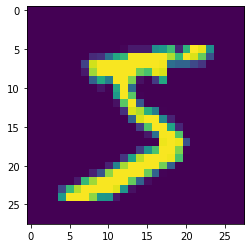

In [11]:
# plot the digit
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
# To make data points b/w 0 and one
x_train =x_train/125
x_test = x_test/125

In [13]:
# fitting the model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation ='relu'))
model.add(Dense(10,activation ='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# fit the model
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2446 - accuracy: 0.9279 - val_loss: 0.1419 - val_accuracy: 0.9585
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9675 - val_loss: 0.1048 - val_accuracy: 0.9692
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0743 - accuracy: 0.9778 - val_loss: 0.1038 - val_accuracy: 0.9701
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.0906 - val_accuracy: 0.9729
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0935 - val_accuracy: 0.9733
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.1000 - val_accuracy: 0.9724
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.1013 - val_accuracy:

In [18]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
y_prob = y_prob.argmax(axis=1)
y_prob

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prob)

0.9762

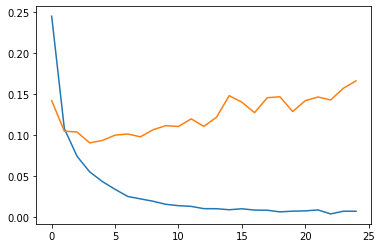

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

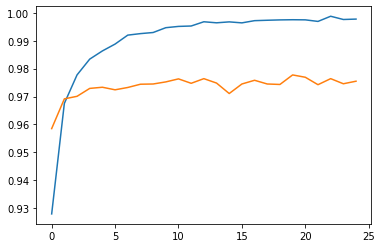

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

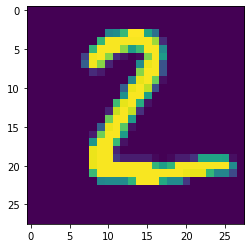

In [24]:
# plot the data
plt.imshow(x_test[1])

In [25]:
# predict the same row
model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 78ms/step


array([2])